In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
movies = pd.read_csv(r'C:\Users\haykh\Desktop\Python\Pandas\imdb_movies.csv')
pd.set_option('display.max_columns', 22)

### Data Cleaning

In [304]:
movies.drop_duplicates(inplace=True)
movies.dropna(subset=['genres'], inplace=True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit']]
split = movies_genre['genres'].str.split('|').explode()
split.name = 'genres_split'
movies_genre = movies_genre.drop(columns=['genres']).join(split)

## Which genres are the most common (number of movies made)?

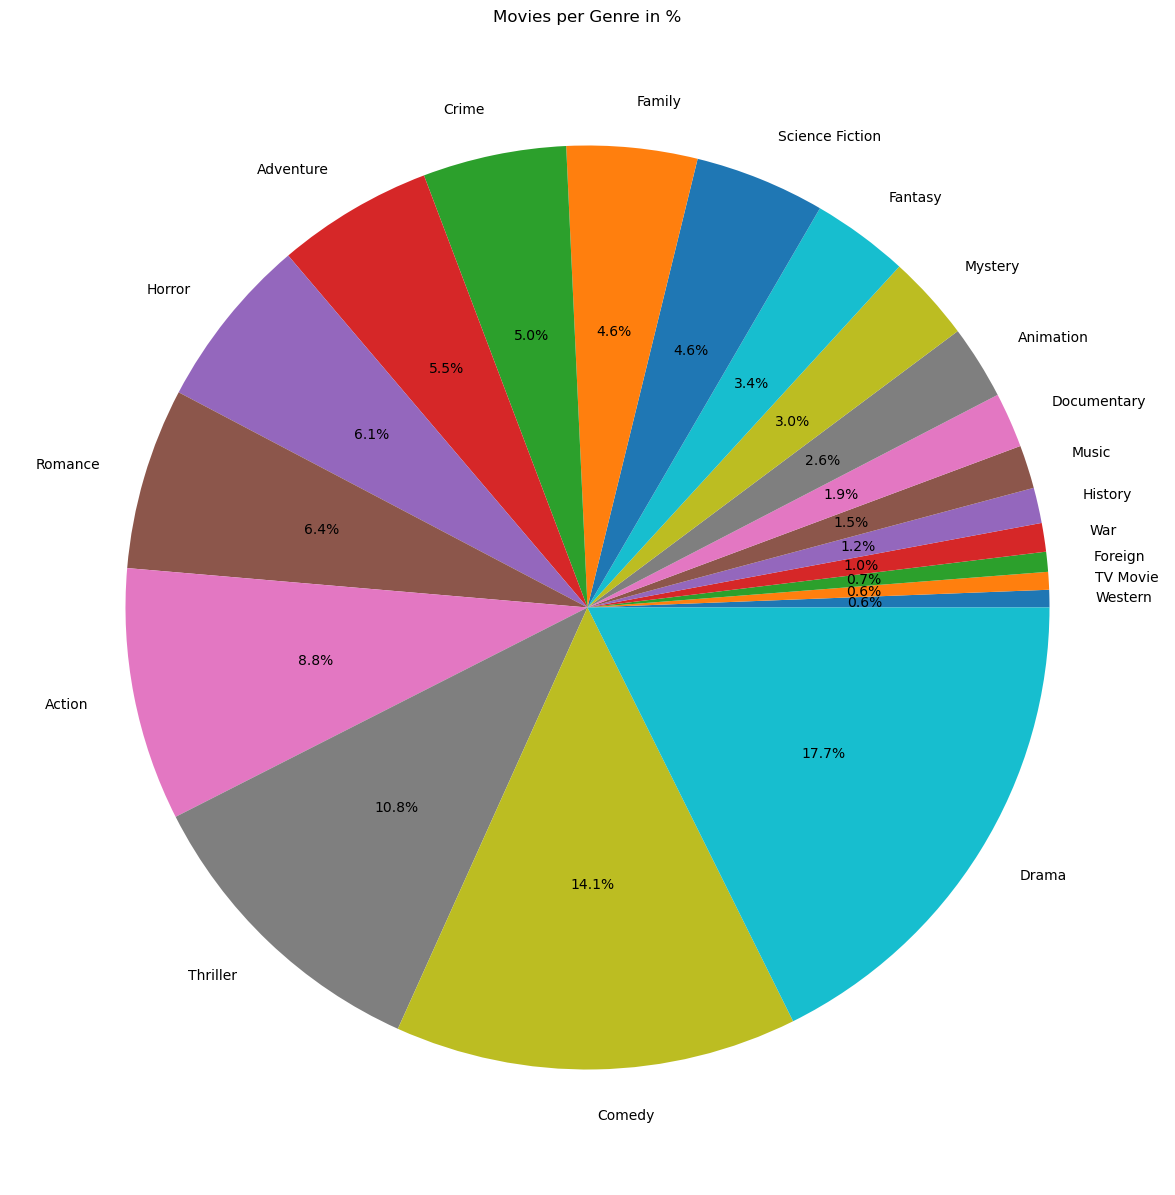

In [306]:
movies_common = movies_genre.groupby('genres_split')['original_title'].count().sort_values(ascending = True)
genres_count = movies_common.reset_index().set_index('genres_split')
genres_count['original_title'].plot.pie(title = 'Movies per Genre in %', autopct = '%1.1f%%' , figsize = (15, 15))
plt.ylabel("")
plt.show()

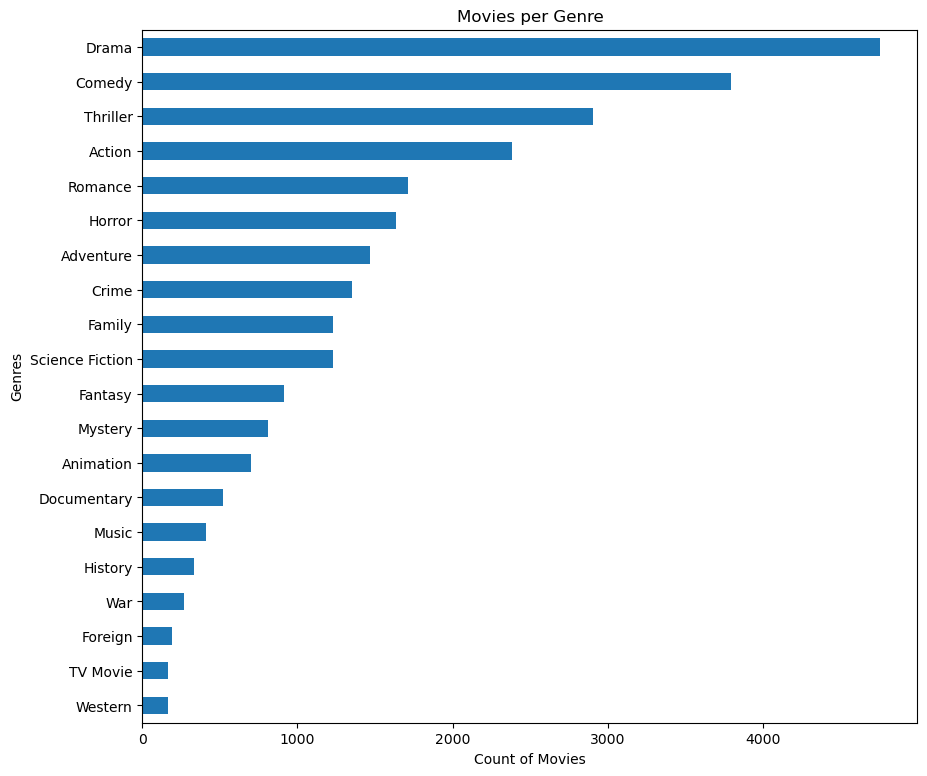

In [307]:
genres_count['original_title'].plot.barh(title = 'Movies per Genre', figsize = (10, 9))
plt.xlabel("Count of Movies")
plt.ylabel("Genres")
plt.show()

### The most common genres are:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

## Which genres have the highest avg. budget and revenue?

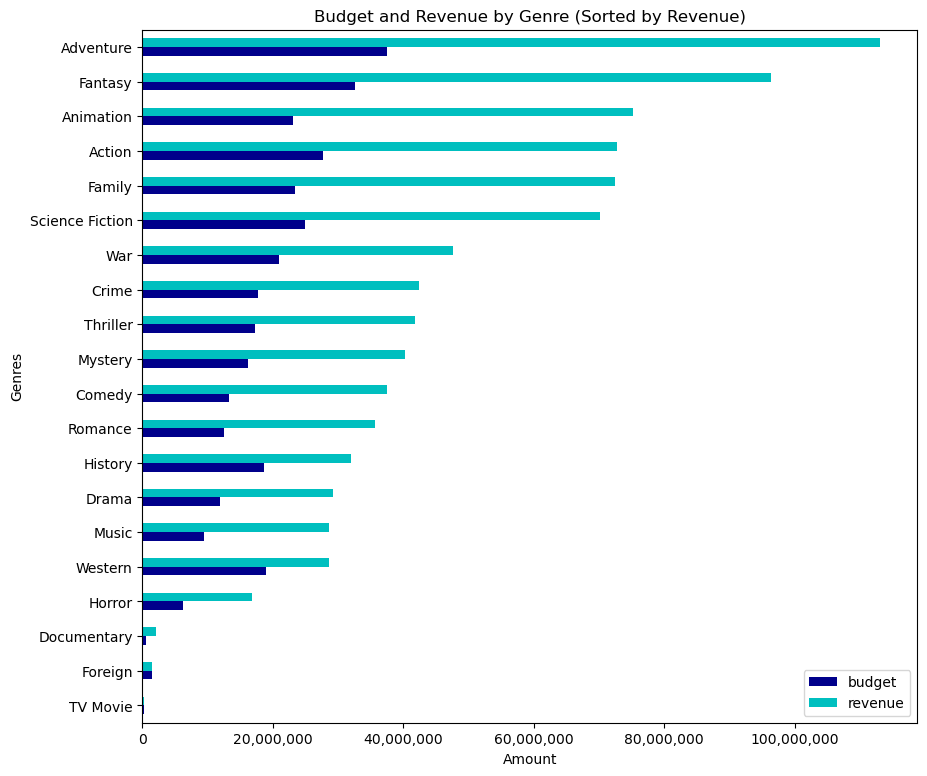

In [309]:
pd.options.display.float_format = '{:.2f}'.format
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
genres_avg.sort_values('revenue', ascending = True, inplace = True)
ax = genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre (Sorted by Revenue)', color = ('DarkBlue', 'c'), figsize = (10, 9))
plt.xlabel("Amount")
plt.ylabel("Genres")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

### The genres with the highest avg. revenue are:
1. Adventure
2. Fantasy
3. Animation
4. Action
5. Family

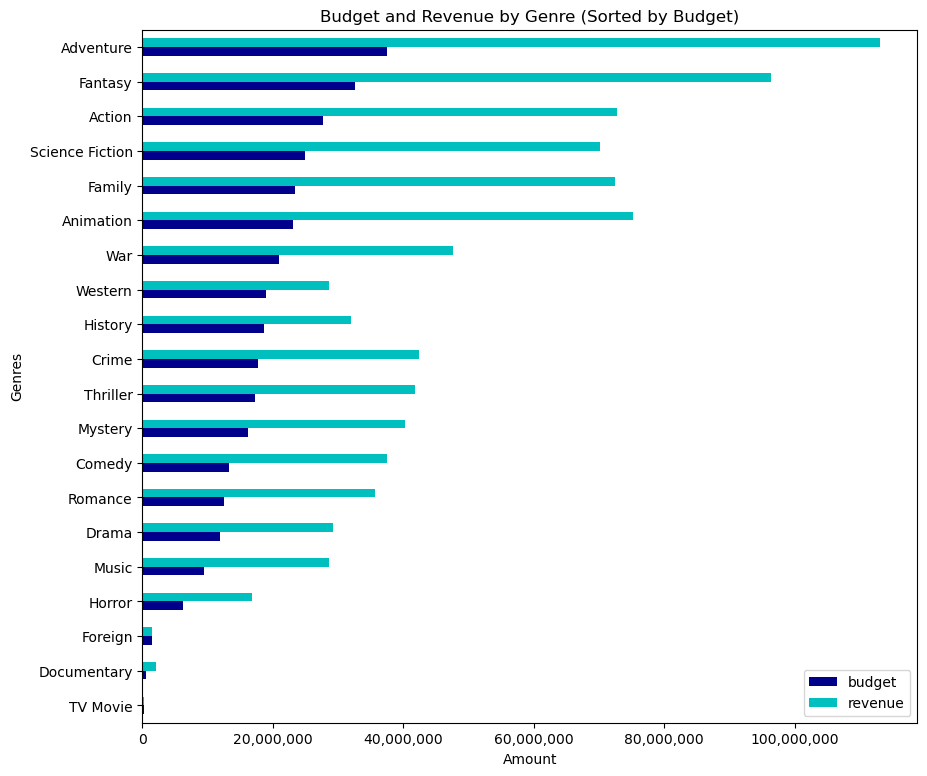

In [310]:
genres_avg.sort_values('budget', ascending = True, inplace = True)
ax = genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre (Sorted by Budget)', color = ('DarkBlue', 'c'), figsize = (10, 9))
plt.xlabel("Amount")
plt.ylabel("Genres")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

### The genres with the highest avg. revenue are:
1. Adventure
2. Fantasy
3. Action
4. Science Fiction
5. Family 

## Which genres have the highest avg. profit?

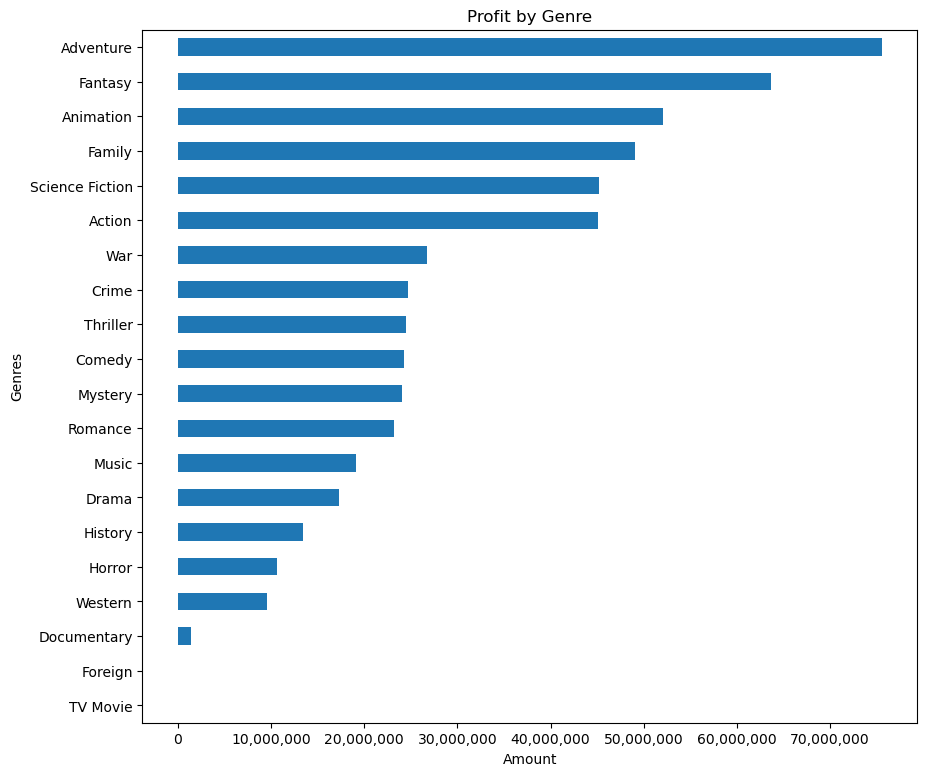

In [312]:
genres_avg.sort_values('profit', inplace = True)
ax = genres_avg['profit'].plot.barh(title = 'Profit by Genre', figsize = (10, 9))
plt.xlabel("Amount")
plt.ylabel("Genres")
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()

### The genres with the highest avg. profit are:
1. Adventure
2. Fantasy
3. Animation
4. Family
5. Science Fiction

## Which genres have the highest avg. popularity?

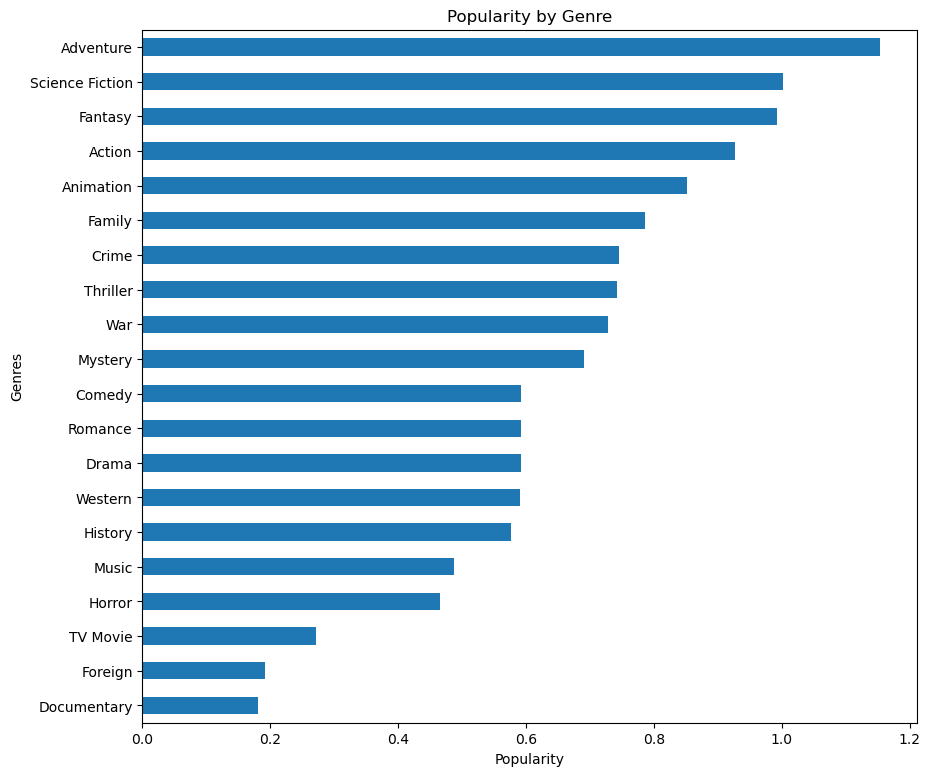

In [314]:
genres_avg.sort_values('popularity', inplace = True)
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', figsize = (10, 9))
plt.xlabel("Popularity")
plt.ylabel("Genres")
plt.show()

### The genres with the highest avg. popularity are:
1. Adventure
2. Science Fiction
3. Fantasy
4. Action
5. Animation

## Which genres have the highest number of movies with a voting avg. >= 8?

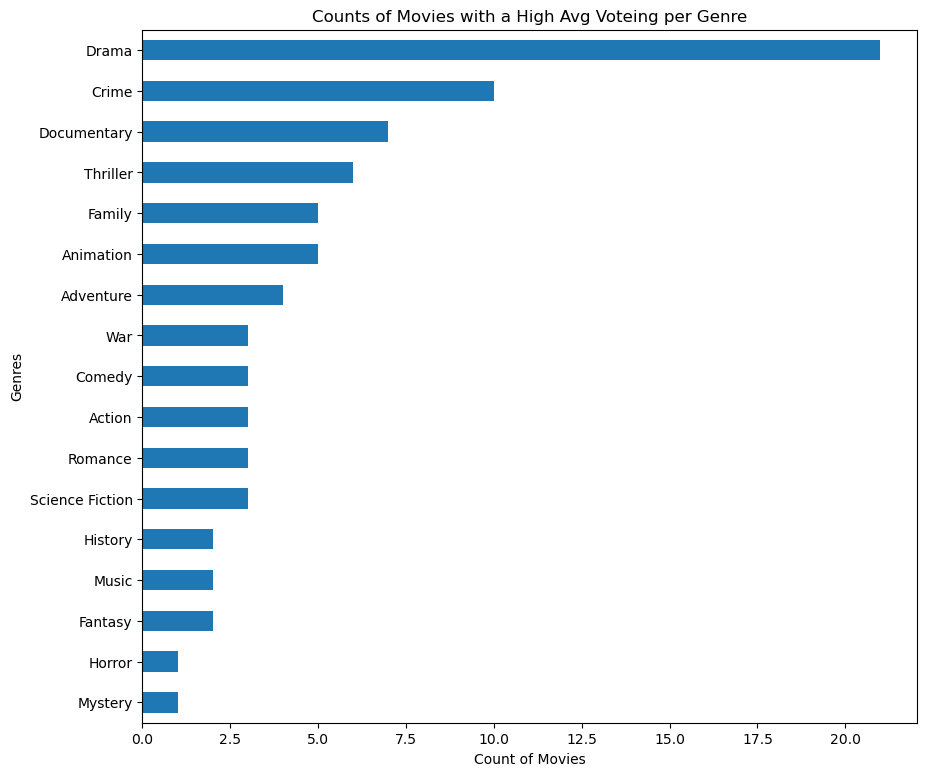

In [316]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
genres_vote = vote_fifty.groupby('genres_split')['vote_average'].count().reset_index().set_index('genres_split').sort_values('vote_average')
genres_vote['vote_average'].plot.barh(title = 'Counts of Movies with a High Avg Voteing per Genre', figsize = (10, 9))
plt.xlabel("Count of Movies")
plt.ylabel("Genres")
plt.show()

### The genres the highest number of movies with a voting avg. >= 8 are:
1. Drama
2. Crime
3. Documentary
4. Thriller
5. Family

## Do the best movies according to vote avg. return high profit and revenue?

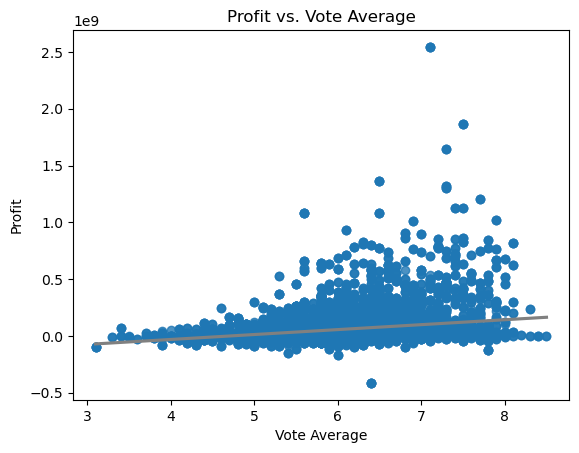

In [318]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]
sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Vote Average")
plt.ylabel("Profit")
plt.title("Profit vs. Vote Average")
plt.show()

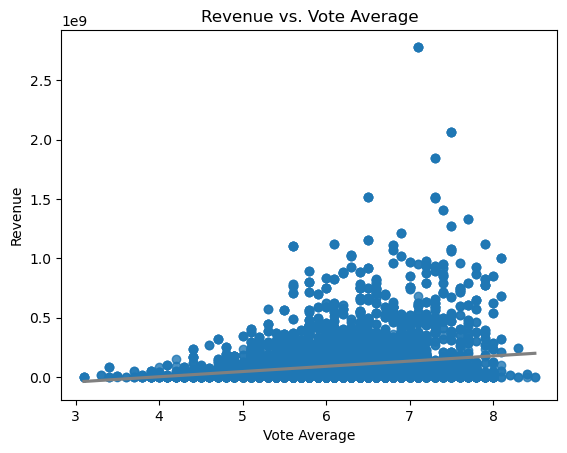

In [319]:
sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Vote Average")
plt.ylabel("Revenue")
plt.title("Revenue vs. Vote Average")
plt.show()

### The correlation is not strong enough to conclude that the best movies (by vote average) always generate high profit.

## Do the best movies according to popularity return high profit and revenue?

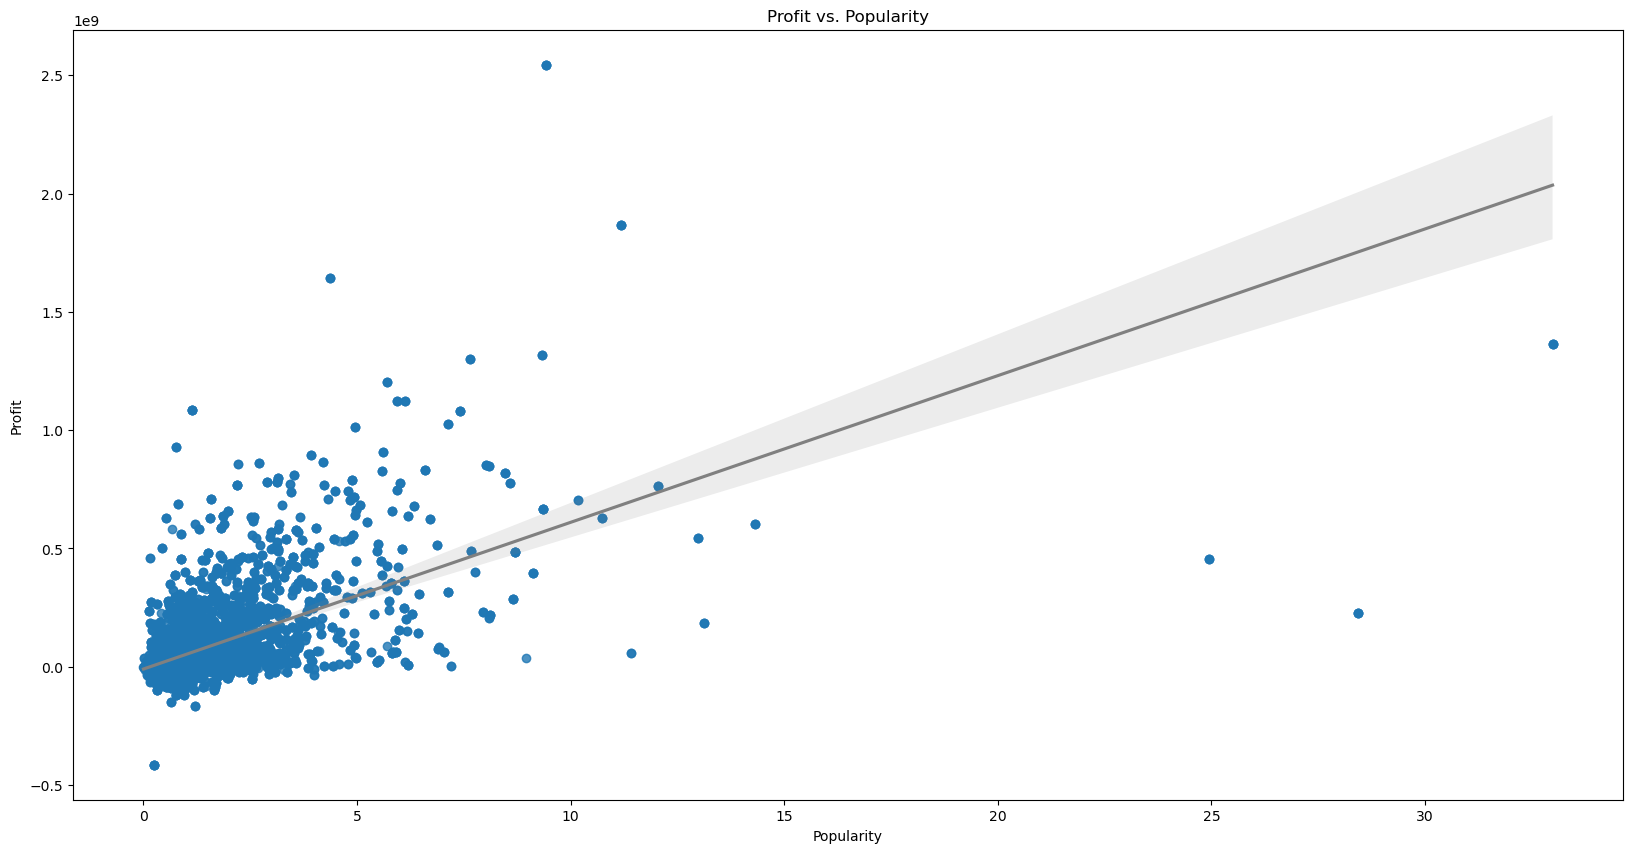

In [321]:
plt.figure(figsize = (20,10))
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Popularity")
plt.ylabel("Profit")
plt.title("Profit vs. Popularity")
plt.show()

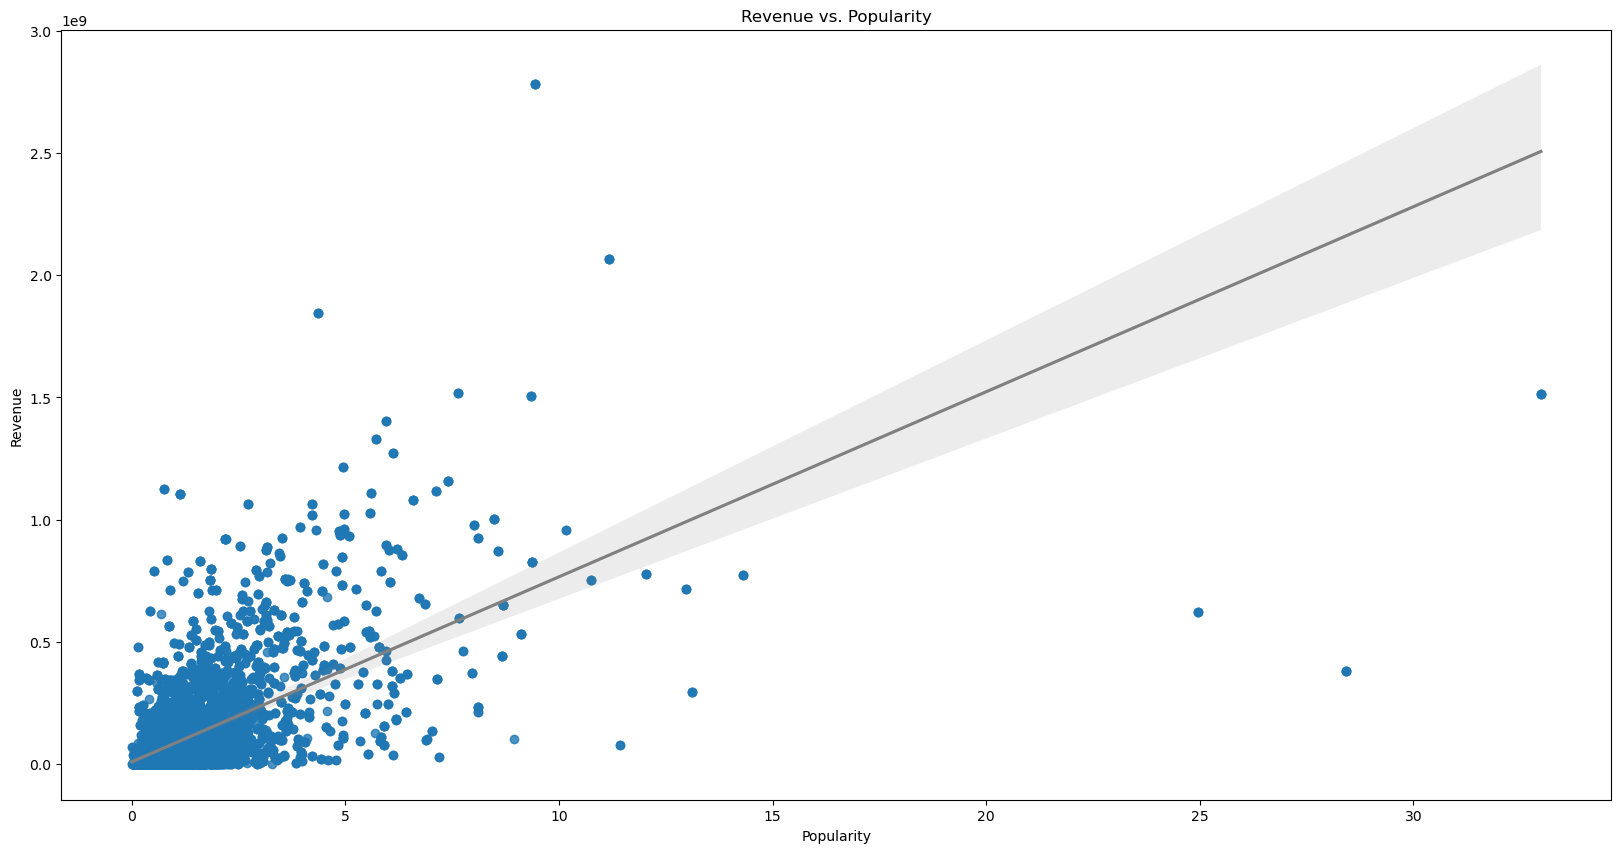

In [322]:
plt.figure(figsize = (20,10))
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.title("Revenue vs. Popularity")
plt.show()

### Yes, movies with higher popularity tend to return higher profit and revenue.

## Do highly budgeted movies return high profit?

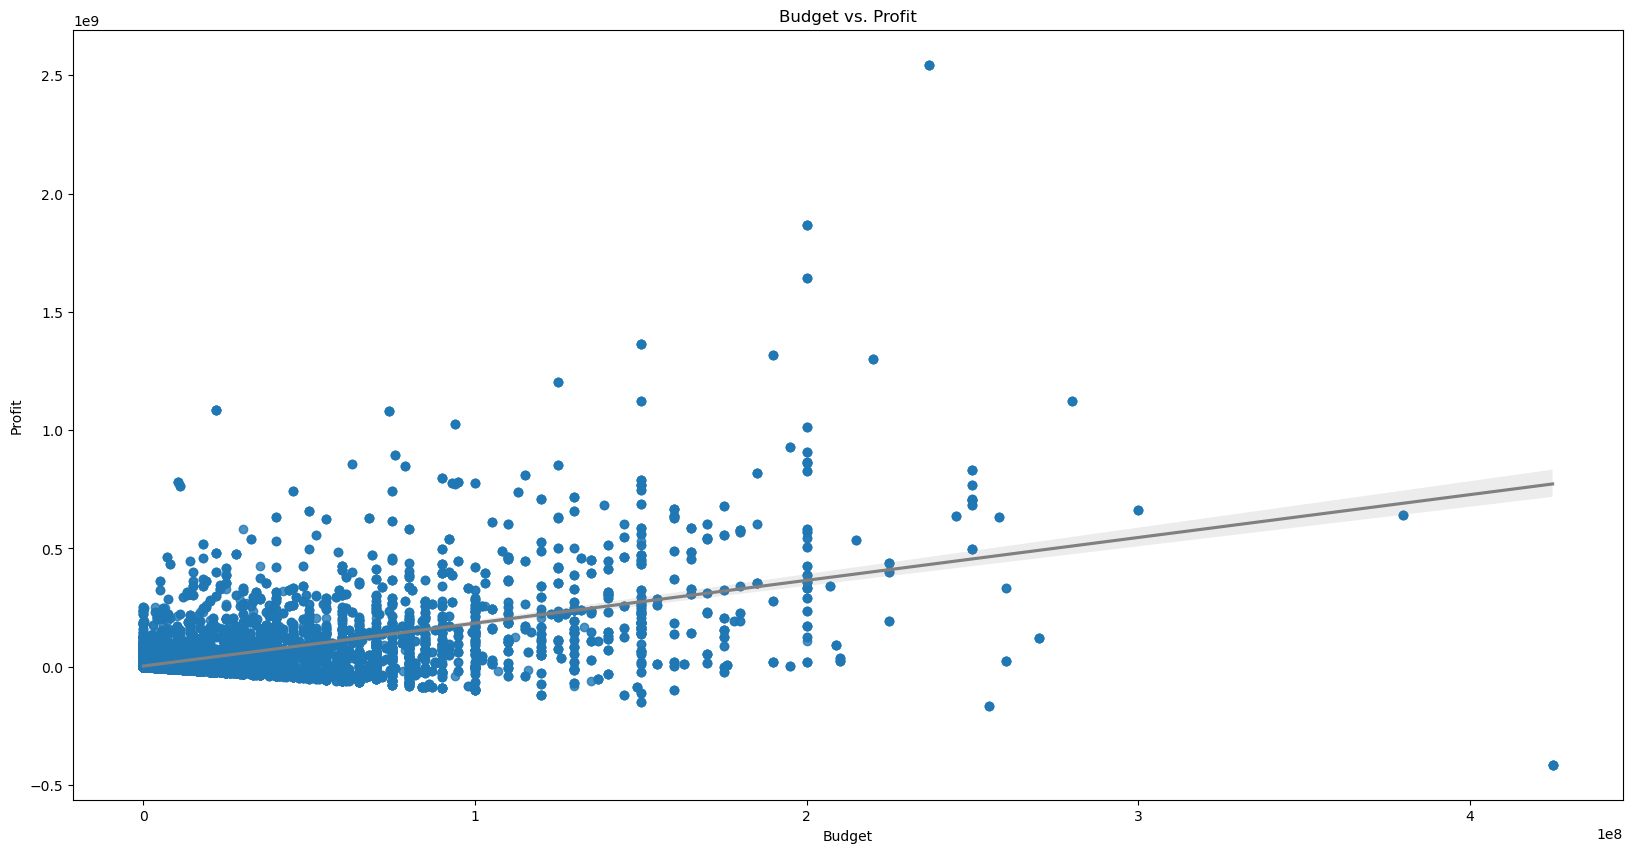

In [324]:
plt.figure(figsize = (20,10))
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.title("Budget vs. Profit")
plt.show()

### While higher-budget movies can yield high profits, the relationship is weak and not definitive.

## Do highly budgeted movies have a high popularity?

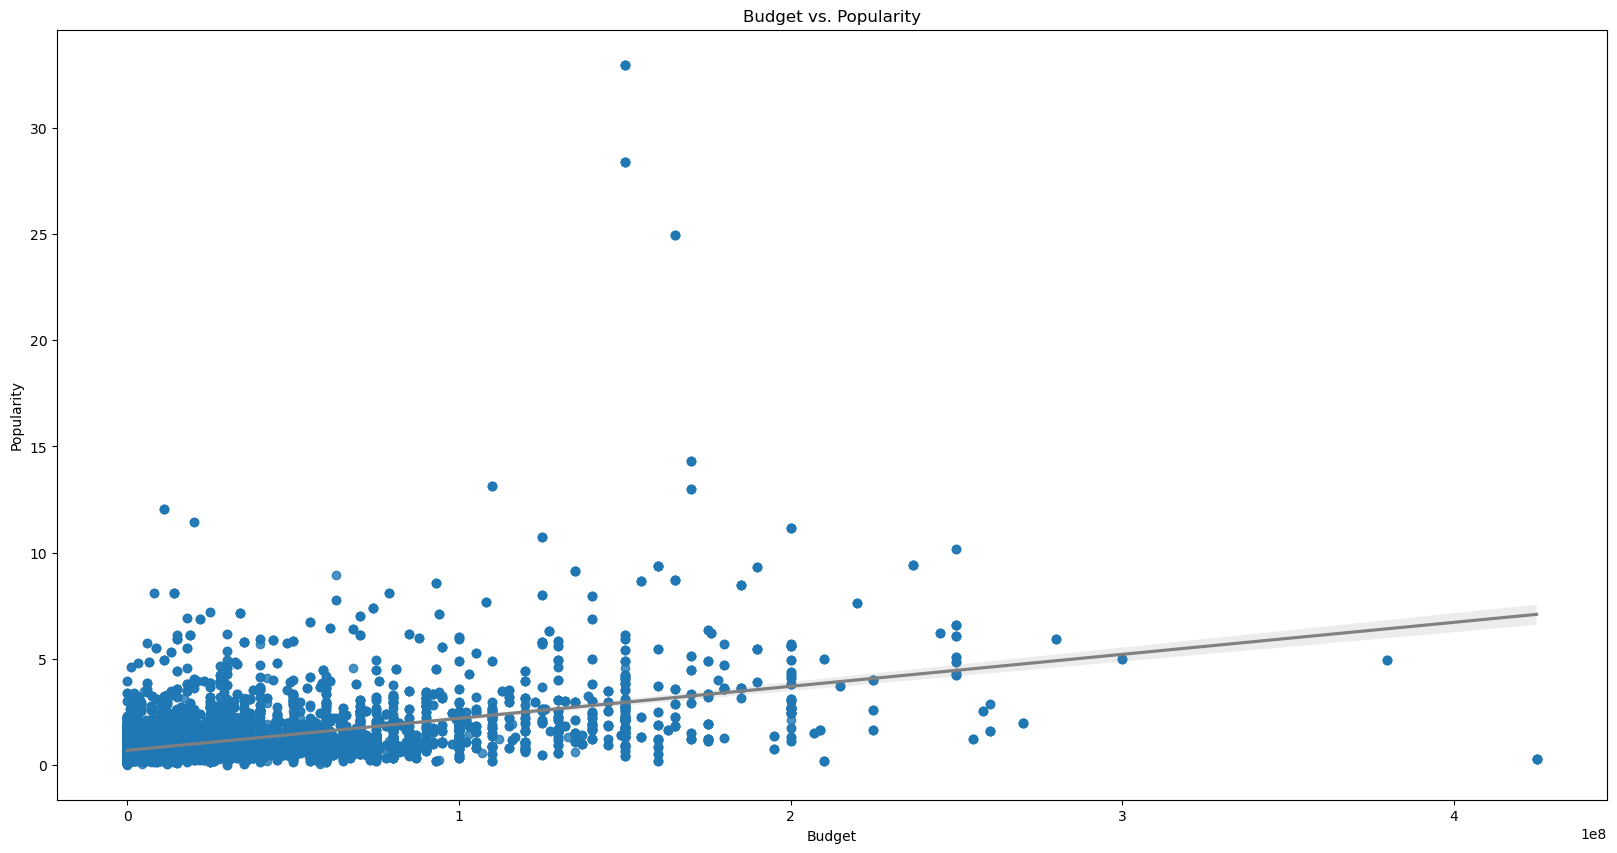

In [326]:
plt.figure(figsize = (20,10))
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {'color': 'grey'})
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.title("Budget vs. Popularity")
plt.show()

### While some highly budgeted movies may achieve high popularity, the weak correlation suggests that spending more on production alone does not guarantee popular success.

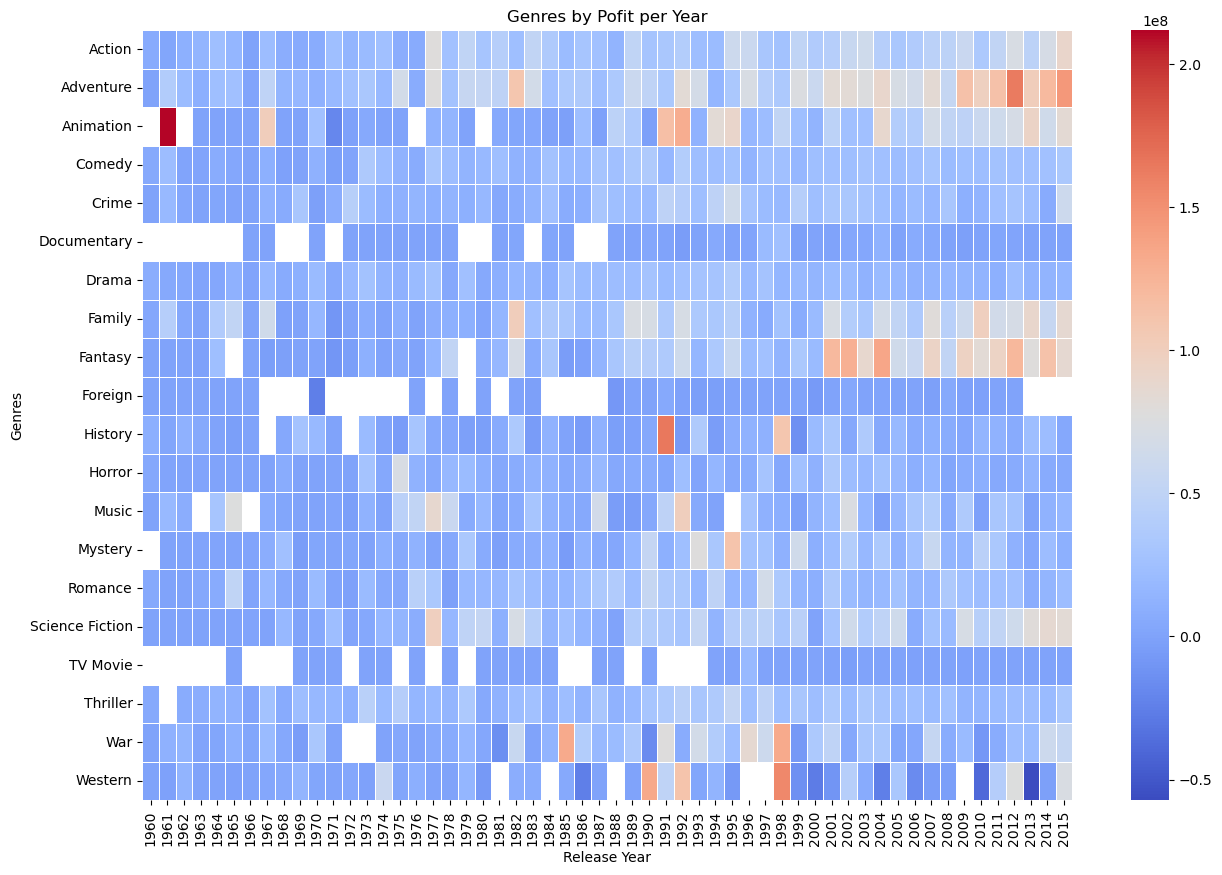

In [327]:
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit']]
split = movies_genre['genres'].str.split('|').explode()
split.name = 'genres_split'
movies_genre = movies_genre.drop(columns=['genres']).join(split)
time_genre = movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean().reset_index()
genre_pivot = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])
plt.figure(figsize = (15,10))
sns.heatmap(genre_pivot, cmap = 'coolwarm', linewidths = .5)
plt.xlabel("Release Year")
plt.ylabel("Genres")
plt.title('Genres by Pofit per Year')
plt.show()